In [53]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
import scipy.io
from scipy import stats as ss
import numpy as np

### Data Loading

In [7]:
D_emp = scipy.io.loadmat('../Monkey D/behavData_dam.mat')
E_emp = scipy.io.loadmat('../Monkey E/behavData_eli.mat')

D_emp_acc_coh = D_emp['task']['data'][0, 1]['coh'][0, 0]
D_emp_acc_rt = D_emp['task']['data'][0, 1]['rt'][0, 0] / 1000

D_emp_speed_coh = D_emp['task']['data'][0, 0]['coh'][0, 0]
D_emp_speed_rt = D_emp['task']['data'][0, 0]['rt'][0, 0] / 1000

E_emp_acc_coh = E_emp['task']['data'][0, 1]['coh'][0, 0]
E_emp_acc_rt = E_emp['task']['data'][0, 1]['rt'][0, 0] / 1000

E_emp_speed_coh = E_emp['task']['data'][0, 0]['coh'][0, 0]
E_emp_speed_rt = E_emp['task']['data'][0, 0]['rt'][0, 0] / 1000

coh_lst = np.sort(np.unique(D_emp_acc_coh))

### Calculation

In [16]:
D_acc_skew = np.zeros(len(coh_lst))
D_speed_skew = np.zeros(len(coh_lst))
E_acc_skew = np.zeros(len(coh_lst))
E_speed_skew = np.zeros(len(coh_lst))

In [19]:
for i in range(len(coh_lst)):
    D_acc_skew[i] = ss.skew(D_emp_acc_rt[D_emp_acc_coh == coh_lst[i]])
    D_speed_skew[i] = ss.skew(D_emp_speed_rt[D_emp_speed_coh == coh_lst[i]])
    E_acc_skew[i] = ss.skew(E_emp_acc_rt[E_emp_acc_coh == coh_lst[i]])
    E_speed_skew[i] = ss.skew(E_emp_speed_rt[E_emp_speed_coh == coh_lst[i]])

### Plotting

In [106]:
parameters = np.arange(0, 7)
    #np.insert(coh_lst, 0, -.05))
norm = matplotlib.colors.Normalize(vmin=np.min(parameters), vmax=np.max(parameters))

c_m = plt.cm.get_cmap('GnBu')
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)

In [137]:
def scatter_skew(acc_skew, speed_skew, monkey):
    fig = plt.figure(figsize=(3.25, 3))
    ax = plt.gca()
    ax_max = max(np.concatenate((acc_skew, speed_skew)))

    for i in range(len(coh_lst)):
        plt.scatter(acc_skew[i], speed_skew[i], color=s_m.to_rgba(parameters[i+1]))
    plt.plot([0, ax_max], [0, ax_max], color='#8D8DAA', linestyle='--')
    
    plt.xlabel("Accuracy Condition")
    plt.ylabel("Speed Condition")
    # ax.set_xlim(0, ax_max+.1)
    # ax.set_ylim(0, ax_max+.1)
    plt.axis('equal')
    
    ax.spines['bottom'].set_color('0')
    ax.spines['left'].set_color('0')
    ax.tick_params(bottom=True, left=True)
    
    font_size = 15
    params = {
         'legend.fontsize': font_size,
         'axes.labelsize': font_size,
         'axes.titlesize': font_size,
         'xtick.labelsize': font_size,
         'ytick.labelsize': font_size,
         'axes.facecolor': 'white',
    }
    pylab.rcParams.update(params)
    fig.tight_layout()
    
    cbar_ax = fig.add_axes([1, 0.3, 0.05, 0.5])
    plt.grid(False)
    bar = fig.colorbar(s_m, cax=cbar_ax)

    plt.savefig(f'graphs/{monkey}_skewness.tiff', format='tiff', bbox_inches='tight')

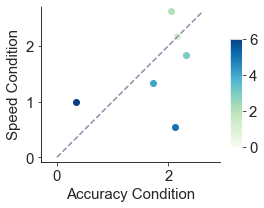

In [138]:
scatter_skew(D_acc_skew, D_speed_skew, 'D')

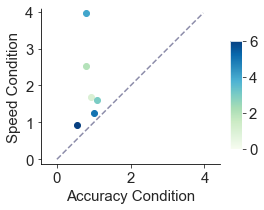

In [139]:
scatter_skew(E_acc_skew, E_speed_skew, 'E')